In [5]:
%cd ..
%load_ext autoreload
%autoreload 2

from pdg import PDG, CPT, RJD, RV
from pdg.sim.automaton import Automaton

from matplotlib import pyplot as plt
import numpy as np

c:\Users\Oliver\Research\agents-goals-pressure\code
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exploring the PDG computation

The goal is to explore how a PDG's optimizing update rule works. Let's start with a PDG containing two distributions: $p(Y|X)$ and $q(X|Y)$.  In the corresponding update system, we have $\Phi := \{ p, q\}$, and $\Theta := \Delta(X,Y)$.

Let's start with random choices of the cpds $p$ and $q$. 

In [6]:

M = PDG()
A,B,C = [RV.alph(N, 3) for N in "ABC"]

M += A,B
M += "b", CPT.make_random(A, B)
M += "a", CPT.make_random(B, A)

a = Automaton(M)

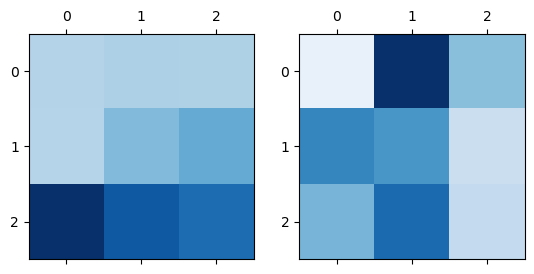

In [96]:
# Let's visualize the two cpds that were randomized
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.matshow(a.state.broadcast(M['a']),cmap='Blues', vmin=0); 
ax2.matshow(a.state.broadcast(M['b']),cmap='Blues', vmin=0); 
plt.show();

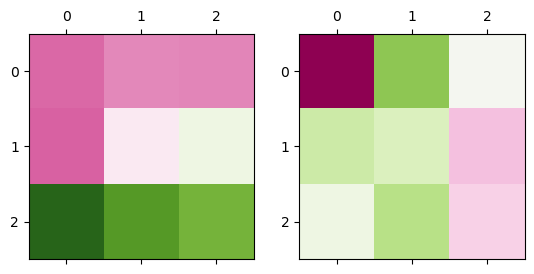

In [82]:
a.plot_vectorfields('a', 'b')

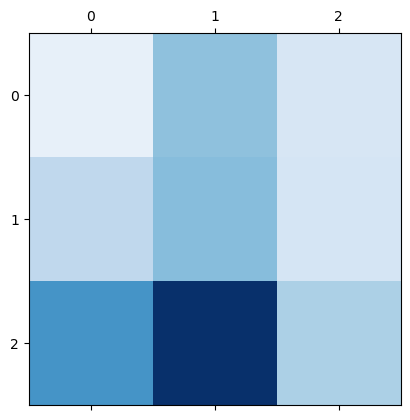

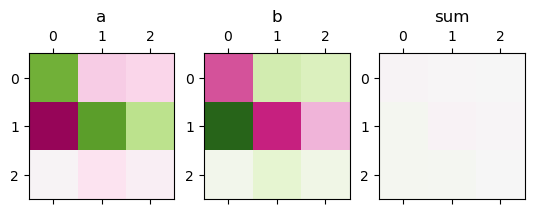

In [93]:
a.update(['a', 'b']*1000, 0.001)
# a.update('a', 1000)
plt.matshow(a.state.data,cmap='Blues', vmin=0); 
a.plot_vectorfields('a','b')

In [94]:
M.Inc(a.state)

(0.055118472384939485+0j)

## What if the distributions are consistent?

In [97]:
rand_joint = M.genΔ(RJD.random)

M2 = PDG()
M2 += "a2",  rand_joint[A|B]
M2 += "b2",  rand_joint[B|A]
a2 = Automaton(M2)

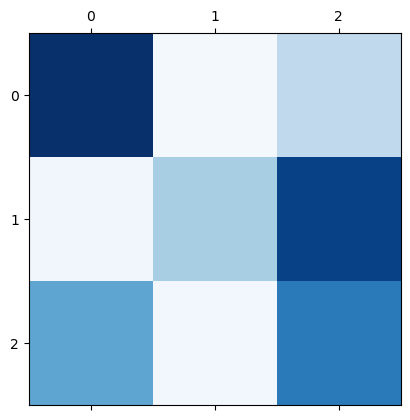

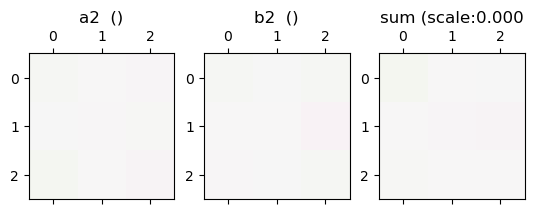

In [103]:
a2.update(['a2', 'b2']*100, 0.01)
# a.update('a', 1000)
plt.matshow(a2.state.data,cmap='Blues', vmin=0); 
a2.plot_vectorfields('a2','b2')